# **SENTIMENT ANALYSIS - REVIEW PENGGUNA APLIKASI WHATSAPP**

- Review aplikasi whatsapp terbaru
- Data yang digunakan adalah data review tahun 2025
- Digunakan untuk menganalisis sentiment pengguna whatsapp versi 2025

Create at: 15/12/2025

# Import Library dan Load Dataset

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\Dataset Projek/whatssap_reviews.csv")

# Analisis Dataset

In [3]:
print("Shape dataset:", df.shape)

Shape dataset: (1370119, 8)


In [4]:
print("\nPreview data:")
display(df.head())


Preview data:


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,ae595441-49bd-43fb-89ff-eb3ea75107a8,Paul Urioh,good,5,0,2.25.35.79,2025-12-09 10:56:33,2.25.35.79
1,91209f71-f774-4f7e-94e7-85b9fb9ee836,Mariano Fernandes,when call not answering the phone keep on hold...,3,0,2.25.35.79,2025-12-09 10:56:16,2.25.35.79
2,eb51fdf6-60cb-4ce6-99b3-2779326e63e7,Moses,Very bad,2,0,NaN,2025-12-09 10:56:16,NaN
3,28ce12a5-450e-4ab2-bbaf-52f578ba3526,Saif Jalbani,I'm WhatsApp lover and I recommend this messag...,4,0,2.25.35.79,2025-12-09 10:55:20,2.25.35.79
4,ff68a949-16a0-453e-8149-11b32e5f241b,Linyama Masiye,it's really wonderful to use it for calls,4,0,2.25.26.74,2025-12-09 10:55:17,2.25.26.74


In [5]:
print("\nInfo dataset:")
df.info()


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370119 entries, 0 to 1370118
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   reviewId              1370119 non-null  object
 1   userName              1370113 non-null  object
 2   content               1370002 non-null  object
 3   score                 1370119 non-null  int64 
 4   thumbsUpCount         1370119 non-null  int64 
 5   reviewCreatedVersion  1122810 non-null  object
 6   at                    1370119 non-null  object
 7   appVersion            1122810 non-null  object
dtypes: int64(2), object(6)
memory usage: 83.6+ MB


Cek Missing Value

In [6]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
reviewId                     0
userName                     6
content                    117
score                        0
thumbsUpCount                0
reviewCreatedVersion    247309
at                           0
appVersion              247309
dtype: int64


Cek Duplikasi

In [7]:
duplicates = df.duplicated().sum()
print("\nJumlah duplikasi:", duplicates)


Jumlah duplikasi: 13725


# Pembersihan Data dan Struktur

In [8]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,ae595441-49bd-43fb-89ff-eb3ea75107a8,Paul Urioh,good,5,0,2.25.35.79,2025-12-09 10:56:33,2.25.35.79
1,91209f71-f774-4f7e-94e7-85b9fb9ee836,Mariano Fernandes,when call not answering the phone keep on hold...,3,0,2.25.35.79,2025-12-09 10:56:16,2.25.35.79
2,eb51fdf6-60cb-4ce6-99b3-2779326e63e7,Moses,Very bad,2,0,NaN,2025-12-09 10:56:16,NaN
3,28ce12a5-450e-4ab2-bbaf-52f578ba3526,Saif Jalbani,I'm WhatsApp lover and I recommend this messag...,4,0,2.25.35.79,2025-12-09 10:55:20,2.25.35.79
4,ff68a949-16a0-453e-8149-11b32e5f241b,Linyama Masiye,it's really wonderful to use it for calls,4,0,2.25.26.74,2025-12-09 10:55:17,2.25.26.74


Hapus Kolom Tidak Relevan

In [9]:
df.drop(columns=['userName', 'reviewCreatedVersion'], inplace=True)

Ubah Nama Kolom

In [10]:
df = df.rename(columns={
    'reviewId': 'user_id',
    'content': 'review',
    'score': 'rating',
    'thumbsUpCount': 'upvote',
    'at': 'datetime',
    'appVersion': 'app_version'
})

Ubah Tipe Data

In [11]:
df['user_id'] = df['user_id'].astype('string')
df['review'] = df['review'].astype('string')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').astype('Int64')
df['upvote'] = pd.to_numeric(df['upvote'], errors='coerce').astype('Int64')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['app_version'] = df['app_version'].astype('string')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370119 entries, 0 to 1370118
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   user_id      1370119 non-null  string        
 1   review       1370002 non-null  string        
 2   rating       1370119 non-null  Int64         
 3   upvote       1370119 non-null  Int64         
 4   datetime     1370119 non-null  datetime64[ns]
 5   app_version  1122810 non-null  string        
dtypes: Int64(2), datetime64[ns](1), string(3)
memory usage: 65.3 MB


In [13]:
df.isnull().sum()

user_id             0
review            117
rating              0
upvote              0
datetime            0
app_version    247309
dtype: int64

Atasi Missing Value

In [14]:
df['review'] = df['review'].fillna('no_review')
df['app_version'] = df['app_version'].fillna('unknown')

In [15]:
df.isnull().sum()

user_id        0
review         0
rating         0
upvote         0
datetime       0
app_version    0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(13726)

Tampilkan Baris Duplikasi

In [17]:
df[df.duplicated()].head(10)

,user_id,review,rating,upvote,datetime,app_version
1232192,95b4c571-c584-46fb-b41f-d66cfa377812,best,5,0,2024-05-17 12:05:33,2.24.8.85
1232193,ba6ffbaa-be27-48a5-bcdc-0bae3f936c49,super,5,0,2024-05-17 12:05:31,2.24.7.81
1232194,61a15dfb-225d-4846-afb2-907d187f013b,very helpful 😃,5,0,2024-05-17 12:05:27,2.24.9.78
1232195,f356a7a7-0c8d-4836-b864-7fba6900f00e,Excellent,5,0,2024-05-17 12:05:19,2.24.9.78
1232196,85f9ef85-1805-4b1d-b058-75ce10226089,super,5,0,2024-05-17 12:05:13,2.24.9.78
1232197,edd315ac-482a-44c1-aaac-502a9d6601ed,it's great when I call my parents and friends,5,0,2024-05-17 12:05:11,2.24.9.78
1232198,3ca1e4d1-4e9a-484c-9e55-14ab14143325,My account no open please help me,5,0,2024-05-17 12:04:54,unknown
1232199,9ed52b28-ab0e-4d3c-9217-43d8675bac91,It's best,5,0,2024-05-17 12:04:30,2.24.2.76
1232200,012d5dbb-ec9d-43fd-a714-5c4640e68b85,niku,5,0,2024-05-17 12:04:23,2.24.9.78
1232201,5a4b9c09-d5e9-46b5-ad0d-09bd5a22d417,Good,5,0,2024-05-17 12:04:19,2.24.4.76


Cek Duplikat Bedasarkan Kesamaan ID User

In [18]:
df[df.duplicated(subset=['user_id'], keep=False)].sort_values('user_id').head(10)

,user_id,review,rating,upvote,datetime,app_version
1235494,0001e50c-a810-4830-80e9-09efa0d4330b,gud 👍,4,0,2024-05-17 05:09:58,2.24.8.85
1240770,0001e50c-a810-4830-80e9-09efa0d4330b,gud 👍,4,0,2024-05-17 05:09:58,2.24.8.85
1230279,0001e50c-a810-4830-80e9-09efa0d4330b,gud 👍,4,0,2024-05-17 05:09:58,2.24.8.85
1240751,00047dad-e71c-4eb1-b42b-c7859fc36c79,ok,2,0,2024-05-17 05:11:58,2.24.9.78
1235475,00047dad-e71c-4eb1-b42b-c7859fc36c79,ok,2,0,2024-05-17 05:11:58,2.24.9.78
1230260,00047dad-e71c-4eb1-b42b-c7859fc36c79,ok,2,0,2024-05-17 05:11:58,2.24.9.78
1130566,0004da95-8c79-422d-83a9-bd844c0ff4da,Murarali,5,0,2024-06-03 10:50:44,2.24.10.85
1078740,0004da95-8c79-422d-83a9-bd844c0ff4da,"Apartment cleaning, Villa cleaning, Carpet cle...",5,0,2024-06-21 19:03:37,2.23.23.78
622835,0008aded-43e5-4b78-8af0-87dff8f1dcda,நோ குட்,4,0,2024-11-24 11:56:53,2.23.21.88
617394,0008aded-43e5-4b78-8af0-87dff8f1dcda,நோட் ஒர்கிங் வாட் அப்போ,4,0,2024-11-27 03:33:41,2.24.23.78


Hapus Duplikat

In [19]:
df = df.drop_duplicates(
    subset=['user_id', 'review', 'rating', 'upvote', 'datetime', 'app_version'],
    keep='first'
)
print("Shape setelah drop duplicates:", df.shape)

Shape setelah drop duplicates: (1356393, 6)


In [20]:
df[df.duplicated(subset=['user_id'], keep=False)].sort_values('user_id').head(15)

,user_id,review,rating,upvote,datetime,app_version
1078740,0004da95-8c79-422d-83a9-bd844c0ff4da,"Apartment cleaning, Villa cleaning, Carpet cle...",5,0,2024-06-21 19:03:37,2.23.23.78
1130566,0004da95-8c79-422d-83a9-bd844c0ff4da,Murarali,5,0,2024-06-03 10:50:44,2.24.10.85
617394,0008aded-43e5-4b78-8af0-87dff8f1dcda,நோட் ஒர்கிங் வாட் அப்போ,4,0,2024-11-27 03:33:41,2.24.23.78
622835,0008aded-43e5-4b78-8af0-87dff8f1dcda,நோ குட்,4,0,2024-11-24 11:56:53,2.23.21.88
170700,000940ee-e613-48fc-ade6-89755bde8341,The app provides me great experiences... Still...,5,109,2025-07-17 11:19:35,2.25.19.83
692579,000940ee-e613-48fc-ade6-89755bde8341,The app provides me great experiences... Still...,5,0,2024-11-01 03:02:50,2.24.21.79
1104695,0009ad13-d202-462a-9aae-559ebed540ce,"I wish Whatsapp can ad tag on status post, it ...",4,0,2024-06-14 10:06:49,2.24.11.79
679454,0009ad13-d202-462a-9aae-559ebed540ce,"I wish Whatsapp can add tag on status post, it...",4,0,2024-11-07 05:46:35,2.24.22.78
869347,000bf6f8-06d0-4f84-a79c-5bb5f6559eb7,"I can't connect to WhatApp why,,?",1,1,2024-08-17 12:54:04,2.24.15.78
1277237,000bf6f8-06d0-4f84-a79c-5bb5f6559eb7,I can't connect to WhatApp why did this happen...,1,1,2024-05-04 13:29:41,2.24.8.85


# Analisis dan Visualisasi Data

In [21]:
# Optional kalau mau tampil lebih bagus
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [22]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.to_period('M').astype(str)
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day_name()

# Jumlah Review Per tahun

In [23]:
reviews_per_year = df.groupby('year').size().reset_index(name='total_reviews')

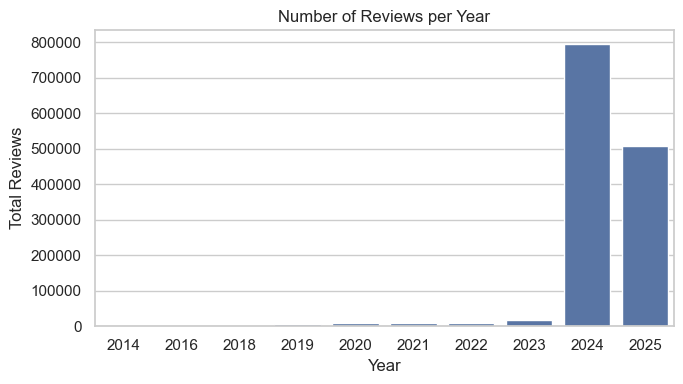

In [24]:
plt.figure(figsize=(7,4))
sns.barplot(data=reviews_per_year, x='year', y='total_reviews')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.tight_layout()
plt.show()

# Jumlah Review Per Tahun & Versi Aplikasi

In [25]:
reviews_year_version = (
    df.groupby(['year', 'app_version'])
    .size()
    .reset_index(name='total_reviews')
)

In [26]:
# pivot_df = reviews_year_version.pivot(
#     index='year',
#     columns='app_version',
#     values='total_reviews'
# ).fillna(0)

# pivot_df.plot(
#     kind='bar',
#     stacked=True,
#     figsize=(12,5)
# )

# plt.title('Number of Reviews per Year by App Version')
# plt.xlabel('Year')
# plt.ylabel('Total Reviews')
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

Alternatif: fokus ke Top N versi saja (WAJIB kalau versi banyak)

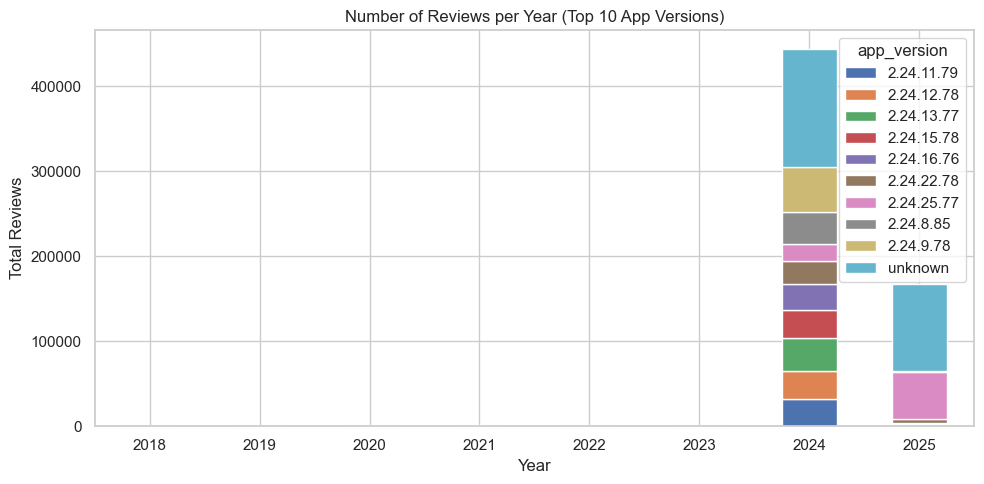

In [27]:
top_versions = (
    df['app_version']
    .value_counts()
    .head(10)
    .index
)

filtered_df = df[df['app_version'].isin(top_versions)]

reviews_year_version_top = (
    filtered_df.groupby(['year', 'app_version'])
    .size()
    .reset_index(name='total_reviews')
)

pivot_top = reviews_year_version_top.pivot(
    index='year',
    columns='app_version',
    values='total_reviews'
).fillna(0)

pivot_top.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)

plt.title('Number of Reviews per Year (Top 10 App Versions)')
plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Jumlah Versi Aplikasi di Tahun 2024-2025

Filter data

In [28]:
df_2425 = df[
    (df['datetime'] >= '2024-01-01') &
    (df['datetime'] <= '2025-12-31')
].copy()

Jumlah versi unik per tahun

In [29]:
version_count_year = (
    df_2425
    .groupby(df_2425['datetime'].dt.year)['app_version']
    .nunique()
    .reset_index(name='total_versions')
)

In [30]:
version_count_year

,datetime,total_versions
0,2024,826
1,2025,718


# Total versi unik selama 2024–2025

In [31]:
total_versions_2425 = df_2425['app_version'].nunique()

print(f"Total unique app versions (2024–2025): {total_versions_2425}")

Total unique app versions (2024–2025): 1156


Versi per bulan

In [32]:
df_2425['month'] = df_2425['datetime'].dt.to_period('M')

version_count_month = (
    df_2425
    .groupby('month')['app_version']
    .nunique()
    .reset_index(name='versions_per_month')
)

version_count_month

,month,versions_per_month
0,2024-01,129
1,2024-02,140
2,2024-03,182
3,2024-04,192
4,2024-05,316
5,2024-06,338
6,2024-07,357
7,2024-08,346
8,2024-09,322
9,2024-10,245


# Versi Aplikasi Ditahun 2025 Saja

In [33]:
# Filter data tahun 2025
df_2025 = df[
    df['datetime'].dt.year == 2025
]

# Ambil app_version unik
unique_versions_2025 = (
    df_2025['app_version']
    .dropna()
    .unique()
)

# Kalau mau rapi jadi DataFrame
unique_versions_2025_df = pd.DataFrame(
    unique_versions_2025,
    columns=['app_version_2025']
)

unique_versions_2025_df

,app_version_2025
0,2.25.35.79
1,unknown
2,2.25.26.74
3,2.25.20.82
4,2.25.32.75
...,...
713,2.24.34.70
714,2.21.5.2
715,2.20.207.20
716,2.21.25.16


In [34]:
df_2025['app_version'].nunique()

718

# Versi Aplikasi Dibulan Desember 2025 Saja

In [35]:
# Filter data Desember 2025
df_dec_2025 = df[
    (df['datetime'].dt.year == 2025) &
    (df['datetime'].dt.month == 12)
]

# Ambil app_version unik
unique_versions_dec_2025 = (
    df_dec_2025['app_version']
    .dropna()
    .unique()
)

# Jadikan DataFrame biar rapi
unique_versions_dec_2025_df = pd.DataFrame(
    unique_versions_dec_2025,
    columns=['app_version_dec_2025']
)

unique_versions_dec_2025_df

,app_version_dec_2025
0,2.25.35.79
1,unknown
2,2.25.26.74
3,2.25.20.82
4,2.25.32.75
...,...
159,2.24.28.71
160,2.19.115
161,2.25.35.2
162,2.24.14.76


In [36]:
df_dec_2025['app_version'].nunique()

164

In [37]:
df_dec_2025.groupby('app_version')['rating'].agg(
    avg_rating='mean',
    total_review='count',
    negative_review=lambda x: (x <= 2).sum()
).sort_values('negative_review', ascending=False)

,avg_rating,total_review,negative_review
app_version,,,
2.25.34.74,4.356931,8433,1011
2.25.35.79,4.014431,2356,474
unknown,4.056229,1814,376
2.25.33.79,4.433018,739,61
2.25.32.75,4.50947,528,37
...,...,...,...
2.25.35.11,5.0,2,0
2.25.5.74,5.0,6,0
2.25.4.77,4.666667,3,0


# Grafik Review Bulanan Tahun 2025

Siapkan data tahun 2025

In [38]:
df_2025 = df[df['datetime'].dt.year == 2025].copy()
df_2025['month'] = df_2025['datetime'].dt.month

Agregasi bulanan (inti analisis)

In [39]:
monthly_summary_2025 = (
    df_2025
    .groupby('month')
    .agg(
        total_reviews=('rating', 'count'),
        avg_rating=('rating', 'mean')
    )
    .reset_index()
)

monthly_summary_2025

,month,total_reviews,avg_rating
0,1,88647,3.99859
1,2,59213,3.969517
2,3,57621,4.004235
3,4,23208,3.871424
4,5,49022,4.056954
5,6,41461,3.976846
6,7,35281,3.952297
7,8,33061,3.969299
8,9,36352,3.919702
9,10,38540,3.958952


Visualisasi: jumlah review per bulan (clean & jelas)

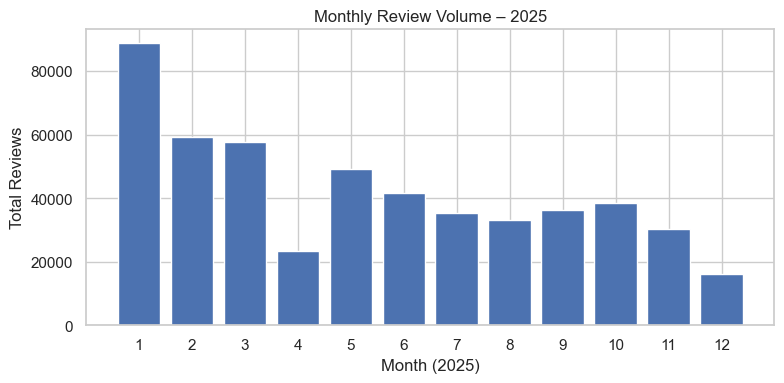

In [40]:
plt.figure(figsize=(8,4))

plt.bar(
    monthly_summary_2025['month'],
    monthly_summary_2025['total_reviews']
)

plt.xlabel('Month (2025)')
plt.ylabel('Total Reviews')
plt.title('Monthly Review Volume – 2025')

plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

rata-rata rating per bulan (indikator kualitas)

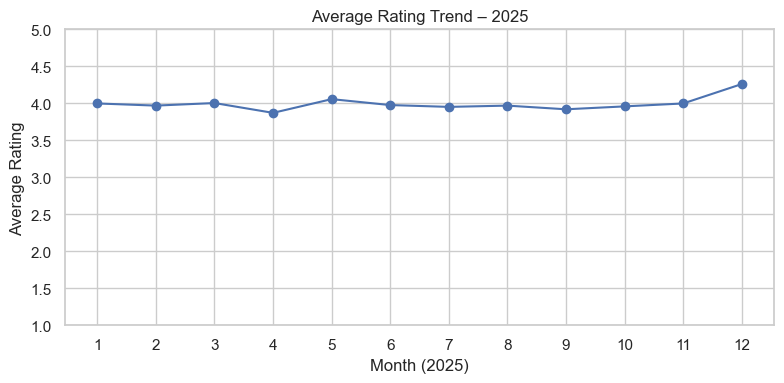

In [41]:
plt.figure(figsize=(8,4))

plt.plot(
    monthly_summary_2025['month'],
    monthly_summary_2025['avg_rating'],
    marker='o'
)

plt.xlabel('Month (2025)')
plt.ylabel('Average Rating')
plt.title('Average Rating Trend – 2025')

plt.xticks(range(1,13))
plt.ylim(1,5)
plt.tight_layout()
plt.show()

# Rating Negatif, Positif, dan Netral

In [42]:
def sentiment_label(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df_2025['sentiment'] = df_2025['rating'].apply(sentiment_label)

Agregasi jumlah review per bulan & sentiment

In [43]:
monthly_sentiment = (
    df_2025
    .groupby(['month', 'sentiment'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

monthly_sentiment

sentiment,month,Negative,Neutral,Positive
0,1,18965,4916,64766
1,2,13077,3262,42874
2,3,12157,3131,42333
3,4,5777,1179,16252
4,5,9720,2534,36768
5,6,9074,2179,30208
6,7,7965,1810,25506
7,8,7373,1644,24044
8,9,8632,1750,25970
9,10,8804,1785,27951


In [44]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(9,5))

# plt.bar(
#     monthly_sentiment['month'],
#     monthly_sentiment['Negative'],
#     label='Negative'
# )

# plt.bar(
#     monthly_sentiment['month'],
#     monthly_sentiment['Neutral'],
#     bottom=monthly_sentiment['Negative'],
#     label='Neutral'
# )

# plt.bar(
#     monthly_sentiment['month'],
#     monthly_sentiment['Positive'],
#     bottom=monthly_sentiment['Negative'] + monthly_sentiment['Neutral'],
#     label='Positive'
# )

# plt.xlabel('Month (2025)')
# plt.ylabel('Number of Reviews')
# plt.title('Monthly Review Sentiment Distribution – 2025')
# plt.xticks(range(1,13))
# plt.legend()
# plt.tight_layout()
# plt.show()

In [45]:
monthly_sentiment['total'] = (
    monthly_sentiment['Negative']
    + monthly_sentiment['Neutral']
    + monthly_sentiment['Positive']
)

monthly_sentiment['neg_pct'] = monthly_sentiment['Negative'] / monthly_sentiment['total'] * 100
monthly_sentiment['neu_pct'] = monthly_sentiment['Neutral'] / monthly_sentiment['total'] * 100
monthly_sentiment['pos_pct'] = monthly_sentiment['Positive'] / monthly_sentiment['total'] * 100

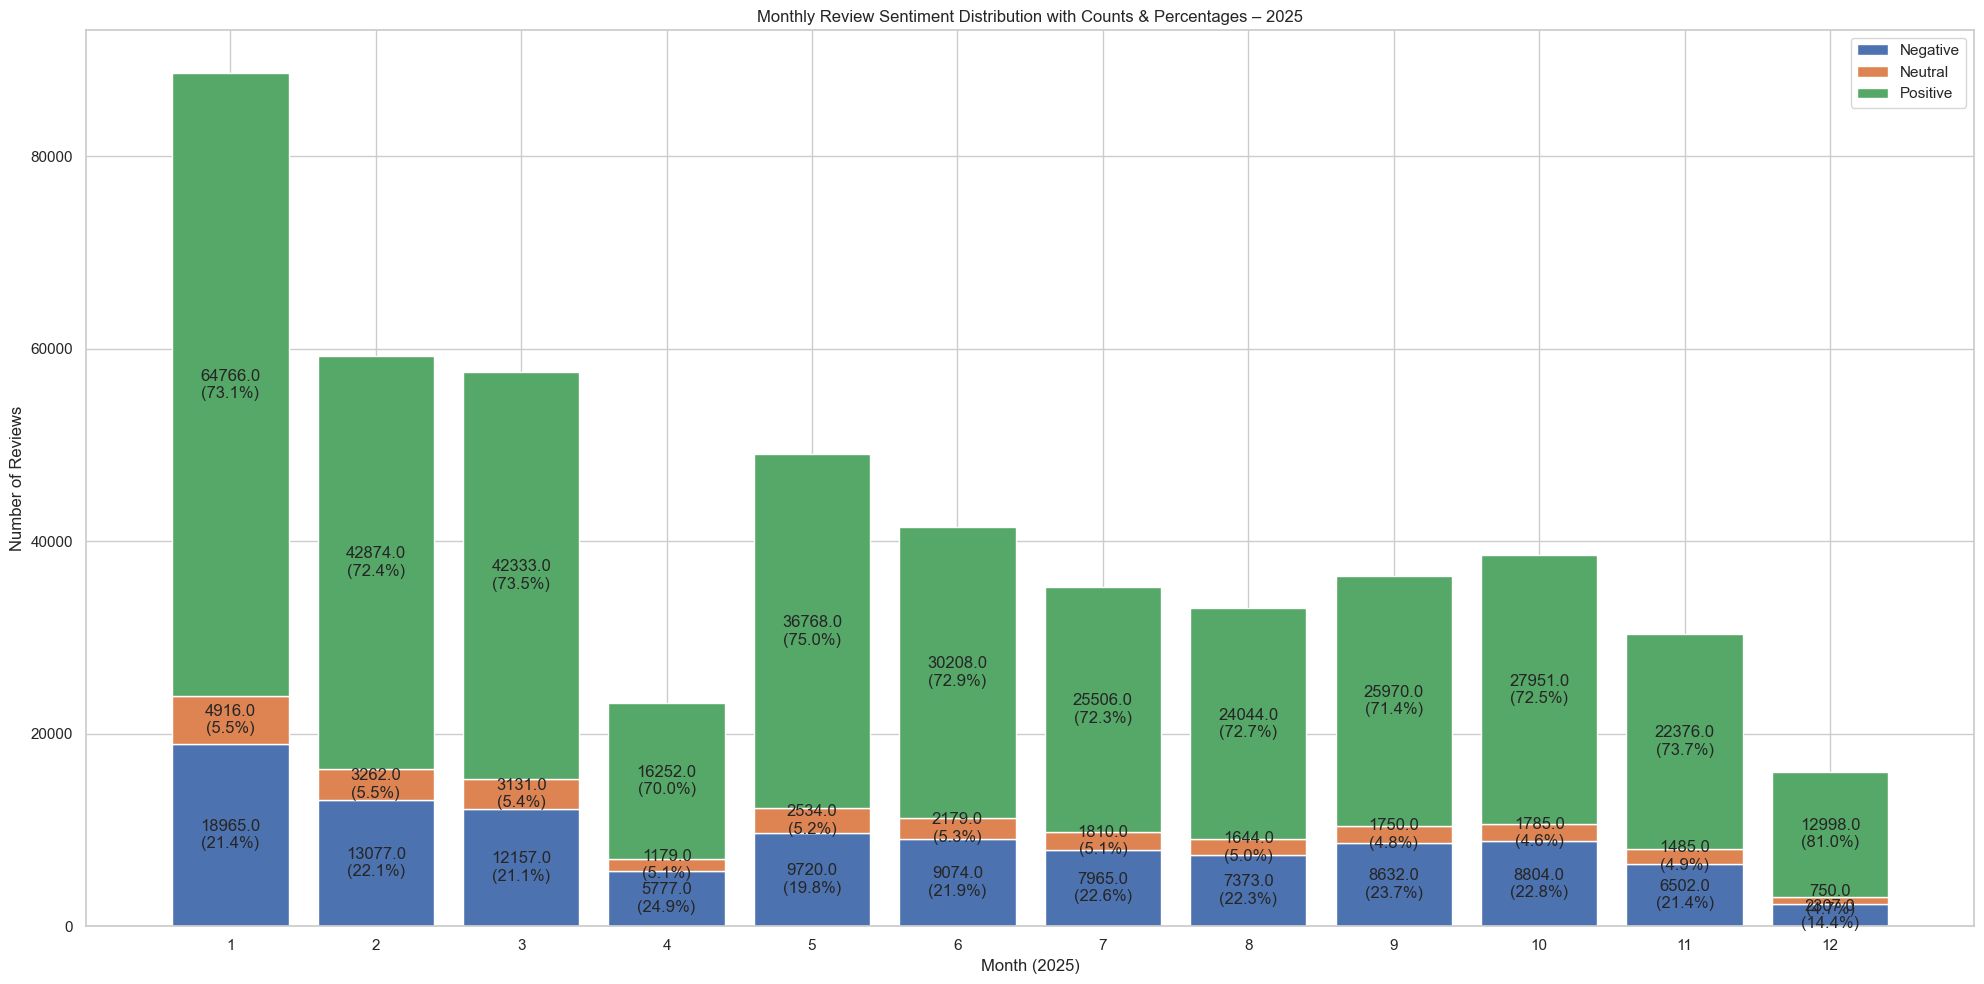

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.bar(
    monthly_sentiment['month'],
    monthly_sentiment['Negative'],
    label='Negative'
)

plt.bar(
    monthly_sentiment['month'],
    monthly_sentiment['Neutral'],
    bottom=monthly_sentiment['Negative'],
    label='Neutral'
)

plt.bar(
    monthly_sentiment['month'],
    monthly_sentiment['Positive'],
    bottom=monthly_sentiment['Negative'] + monthly_sentiment['Neutral'],
    label='Positive'
)

# Tambahkan label di tengah bar
for idx, row in monthly_sentiment.iterrows():
    y_neg = row['Negative'] / 2
    y_neu = row['Negative'] + row['Neutral'] / 2
    y_pos = row['Negative'] + row['Neutral'] + row['Positive'] / 2

    plt.text(row['month'], y_neg,
             f"{row['Negative']}\n({row['neg_pct']:.1f}%)",
             ha='center', va='center', fontsize=12)

    plt.text(row['month'], y_neu,
             f"{row['Neutral']}\n({row['neu_pct']:.1f}%)",
             ha='center', va='center', fontsize=12)

    plt.text(row['month'], y_pos,
             f"{row['Positive']}\n({row['pos_pct']:.1f}%)",
             ha='center', va='center', fontsize=12)

plt.xlabel('Month (2025)')
plt.ylabel('Number of Reviews')
plt.title('Monthly Review Sentiment Distribution with Counts & Percentages – 2025')
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()

# Visualisasi Bulan Desember 2025 Saja

In [47]:
df_dec = df[
    (df['datetime'].dt.year == 2025) &
    (df['datetime'].dt.month == 12)
].copy()

def sentiment_label(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df_dec['sentiment'] = df_dec['rating'].apply(sentiment_label)

In [48]:
sentiment_count = df_dec['sentiment'].value_counts().reindex(
    ['Negative', 'Neutral', 'Positive'], fill_value=0
)

sentiment_pct = sentiment_count / sentiment_count.sum() * 100

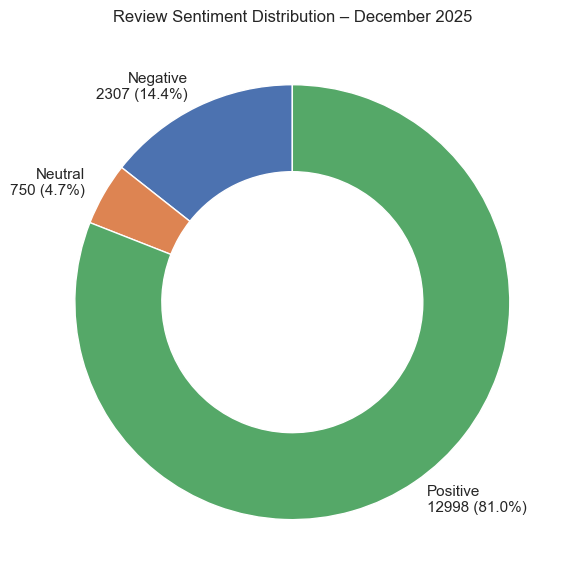

In [49]:
import matplotlib.pyplot as plt

labels = [
    f"Negative\n{sentiment_count['Negative']} ({sentiment_pct['Negative']:.1f}%)",
    f"Neutral\n{sentiment_count['Neutral']} ({sentiment_pct['Neutral']:.1f}%)",
    f"Positive\n{sentiment_count['Positive']} ({sentiment_pct['Positive']:.1f}%)"
]

plt.figure(figsize=(6,6))

plt.pie(
    sentiment_count,
    labels=labels,
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.title('Review Sentiment Distribution – December 2025')
plt.tight_layout()
plt.show()

# Analisis Dampak Review

Review negatif PALING BERDAMPAK

In [50]:
df_dec_neg = df_dec[df_dec['rating'] <= 2]

df_dec_neg.sort_values(
    'upvote',
    ascending=False
).head(10)[
    ['review', 'rating', 'upvote', 'datetime', 'app_version']
]

,review,rating,upvote,datetime,app_version
554,"After the new update, unable to copy or forwar...",1,9731,2025-12-09 05:48:03,2.25.35.79
5737,"I haven't violated any of the Whatsapp rules, ...",2,3101,2025-12-04 10:53:50,2.25.34.74
13923,This app never stops getting worse. The TOTALL...,1,1102,2025-12-03 06:09:04,2.25.35.79
2510,Rating downgraded. Some options are very poor....,1,349,2025-12-07 07:25:47,2.25.29.75
14573,where is my search bar after the new update......,1,288,2025-12-02 08:26:19,2.24.17.79
7131,"please add option to disable status updates, I...",2,284,2025-12-04 08:52:58,2.25.31.76
14018,During video calls the upper part of the scree...,1,108,2025-12-03 05:17:54,2.25.34.74
15170,Please fix the Spam Block feature. Because for...,1,103,2025-12-02 01:14:23,2.25.34.74
111,Very Annoying. Untrustable. Shared status with...,1,89,2025-12-09 09:58:01,2.25.34.74
3175,not bad,1,46,2025-12-06 10:28:20,2.25.34.74


In [51]:
df_dec_net = df_dec[df_dec['rating'] == 3]

df_dec_net.sort_values(
    'upvote',
    ascending=False
).head(10)[
    ['review', 'rating', 'upvote', 'datetime', 'app_version']
]

,review,rating,upvote,datetime,app_version
3099,why do statuses repeat themselves? my contacts...,3,281,2025-12-07 01:30:32,2.25.35.79
15353,Great way to connect to loved ones and locals....,3,31,2025-12-01 09:29:37,2.25.34.74
2946,Use to be nice communication app. Easy to use ...,3,22,2025-12-07 03:20:43,2.25.31.76
13022,Image & Video Quality loss in Status. Status s...,3,8,2025-12-04 01:32:55,2.25.36.6
41,"this new ""about"" is terrible.. I don't want it...",3,4,2025-12-09 10:32:19,2.25.35.79
13594,OK,3,4,2025-12-03 09:40:22,2.25.34.74
14136,"some errors here , but it's good app",3,3,2025-12-03 03:53:30,2.25.33.79
5633,There's this one bug that I experienced before...,3,2,2025-12-05 00:10:11,2.25.35.79
16030,I can't post on my status if I add an audio,3,2,2025-12-01 00:52:16,2.25.34.74
4183,good,3,1,2025-12-06 01:38:53,2.25.35.79


Fitur paling dicintai

In [52]:
df_dec_pos = df_dec[df_dec['rating'] >= 4]

df_dec_pos.sort_values(
    'upvote',
    ascending=False
).head(10)[
    ['review', 'rating', 'upvote', 'datetime', 'app_version']
]

,review,rating,upvote,datetime,app_version
15341,it's the Best messaging app I've used... it's ...,5,9296,2025-12-01 09:35:57,2.25.34.74
15512,"And what is wrong with WhatsApp now a days, if...",4,268,2025-12-01 07:42:00,2.25.34.74
792,for video call,5,195,2025-12-09 03:31:49,2.25.26.74
2611,Sangat berkesan dan keselamatan terjamin denga...,4,172,2025-12-07 06:38:08,2.25.30.73
1692,Why my washapp have problems people can't see ...,5,157,2025-12-08 05:28:04,2.25.19.83
1010,"It's just like whatsapp, it's okay, it's getti...",4,117,2025-12-09 00:07:22,2.25.33.79
14224,Superb,5,98,2025-12-03 02:43:43,2.25.34.74
962,Great app for Androids and apple iPhones 📱📱 so...,5,61,2025-12-09 01:11:38,2.25.35.79
4271,Dear Developers please Include a video call re...,5,39,2025-12-05 10:25:43,2.25.34.74
14717,"latest update, after writing a text n close th...",5,19,2025-12-02 07:05:31,2.25.34.74


# Bobot Analisis Sentimen

In [53]:
weighted_sentiment = (
    df_dec
    .assign(weight=df_dec['upvote'] + 1)
    .groupby('sentiment')['weight']
    .sum()
)

weighted_sentiment

sentiment
Negative    18005
Neutral      1132
Positive    23859
Name: weight, dtype: Int64

Bobot tersebut menjawab: sentimen apa yang paling dirasakan bersama, bukan paling sering muncul.

# Perbandingan Review (Sentiment) Berdasarkan Versi Aplikasi

In [54]:
df_2025 = df[df['datetime'].dt.year == 2025].copy()

def sentiment_label(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df_2025['sentiment'] = df_2025['rating'].apply(sentiment_label)

Hitung jumlah review per versi & sentimen

In [55]:
version_sentiment = (
    df_2025
    .groupby(['app_version', 'sentiment'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

version_sentiment

sentiment,app_version,Negative,Neutral,Positive
0,2.1.10897,0,0,1
1,2.10.222,0,0,1
2,2.11.109,0,0,2
3,2.11.150,1,0,0
4,2.11.152,1,0,3
...,...,...,...,...
713,2.25.9.87,6,2,1
714,2.25.9.88,4,1,5
715,2.6.3985,0,0,1
716,2.7.5813,0,0,1


# Tentukan versi dengan review TERBANYAK per sentimen

Versi dengan review NEGATIF terbanyak

In [56]:
top_negative_version = (
    version_sentiment
    .sort_values('Negative', ascending=False)
    .head(10)
)

top_negative_version

sentiment,app_version,Negative,Neutral,Positive
717,unknown,20947,4611,76186
428,2.24.25.77,11312,3009,40567
487,2.25.1.75,6250,1555,20279
602,2.25.26.74,3106,574,8446
552,2.25.2.85,3077,817,9709
508,2.25.15.80,3057,730,10682
541,2.25.19.83,3042,690,9372
580,2.25.22.80,3009,661,9663
701,2.25.8.84,2936,492,6144
521,2.25.17.80,2656,586,8168


Versi dengan review NETRAL terbanyak

In [57]:
top_neutral_version = (
    version_sentiment
    .sort_values('Neutral', ascending=False)
    .head(10)
)

top_neutral_version

sentiment,app_version,Negative,Neutral,Positive
717,unknown,20947,4611,76186
428,2.24.25.77,11312,3009,40567
487,2.25.1.75,6250,1555,20279
552,2.25.2.85,3077,817,9709
508,2.25.15.80,3057,730,10682
541,2.25.19.83,3042,690,9372
580,2.25.22.80,3009,661,9663
634,2.25.3.82,2538,628,8182
687,2.25.6.74,2197,622,8210
528,2.25.18.80,2515,619,8162


Versi dengan review POSITIF terbanyak

In [58]:
top_positive_version = (
    version_sentiment
    .sort_values('Positive', ascending=False)
    .head(10)
)

top_positive_version

sentiment,app_version,Negative,Neutral,Positive
717,unknown,20947,4611,76186
428,2.24.25.77,11312,3009,40567
487,2.25.1.75,6250,1555,20279
508,2.25.15.80,3057,730,10682
653,2.25.34.74,2210,616,10393
552,2.25.2.85,3077,817,9709
580,2.25.22.80,3009,661,9663
541,2.25.19.83,3042,690,9372
562,2.25.20.82,2472,574,8475
602,2.25.26.74,3106,574,8446


In [59]:
version_sentiment['total_reviews'] = (
    version_sentiment['Negative']
    + version_sentiment['Neutral']
    + version_sentiment['Positive']
)

version_sentiment.sort_values(
    'total_reviews',
    ascending=False
).head(6)

sentiment,app_version,Negative,Neutral,Positive,total_reviews
717,unknown,20947,4611,76186,101744
428,2.24.25.77,11312,3009,40567,54888
487,2.25.1.75,6250,1555,20279,28084
508,2.25.15.80,3057,730,10682,14469
552,2.25.2.85,3077,817,9709,13603
580,2.25.22.80,3009,661,9663,13333


In [60]:
version_sentiment['negative_ratio'] = (
    version_sentiment['Negative'] / version_sentiment['total_reviews']
)

version_sentiment.sort_values(
    'negative_ratio',
    ascending=False
).head(5)

sentiment,app_version,Negative,Neutral,Positive,total_reviews,negative_ratio
712,2.25.9.85,1,0,0,1,1.0
683,2.25.6.16,1,0,0,1,1.0
671,2.25.4.5,1,0,0,1,1.0
668,2.25.4.18,1,0,0,1,1.0
30,2.16.201,1,0,0,1,1.0


Visualisasi

In [61]:
df_2025 = df[df['datetime'].dt.year == 2025].copy()

def sentiment_label(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df_2025['sentiment'] = df_2025['rating'].apply(sentiment_label)